In [4]:
import cv2 as cv
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

def get_vertices_coordinates(height, width):
    a = min(height, width) // 2
    # center coordinates
    x0, y0 = width // 2, height // 2
    print(height, width)
    print(x0, y0)
    A = (width, y0)
    B = (x0 + a // 2, y0 + (sqrt(3) * a) // 2)
    C = (x0 - a // 2, y0 + (sqrt(3) * a) // 2)
    D = (x0 - a, y0)
    E = (x0 - a // 2, y0 - (sqrt(3) * a) // 2)
    F = (x0 + a // 2, y0 - (sqrt(3) * a) // 2)
    vertices = np.array([[A, B, C, D, E, F]], dtype=np.int32)
    return vertices

def extract_hexagon(img):
    height, width = img.shape[:2]
    vertices = get_vertices_coordinates(height, width)
    mask = np.zeros(img.shape, dtype=np.uint8)
    channel_count = img.shape[2]
    print(channel_count)
    ignore_mask_color = (255,)*channel_count
    return cv.fillConvexPoly(mask, vertices, ignore_mask_color)


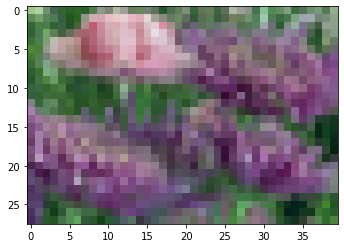

In [5]:
img = cv.imread('./data/colectie/100.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
hex_ = extract_hexagon(img)

28 40
20 14
3


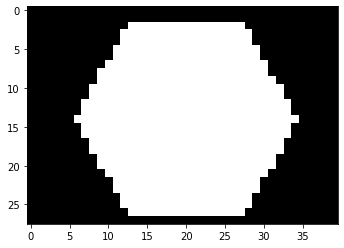

In [9]:
plt.imshow(hex_)

In [10]:
mask = [[1, 2], [2, 3]]
masked = hex_[mask]

/home/francu-richard/tema1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [11]:
masked

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [13]:
mask  = np.array(mask)
mask = np.add(mask, [1, 2])

In [14]:
mask

array([[2, 4],
       [3, 5]])